In [1]:
import pandas as pd
import numpy as np

In [2]:
d1=pd.read_csv("D:/RIT/GA-TECHNICAL DEBTS/rudimentary-stages/data/all/sql12.csv")
d2=pd.read_csv("D:/RIT/GA-TECHNICAL DEBTS/rudimentary-stages/data/all/apache-ant-1.7.0.csv")
d3=pd.read_csv("D:/RIT/GA-TECHNICAL DEBTS/rudimentary-stages/data/all/apache-jmeter-2.10.csv")
d4=pd.read_csv("D:/RIT/GA-TECHNICAL DEBTS/rudimentary-stages/data/all/argouml.csv")
d5=pd.read_csv("D:/RIT/GA-TECHNICAL DEBTS/rudimentary-stages/data/all/columba-1.4-src.csv")
d6=pd.read_csv("D:/RIT/GA-TECHNICAL DEBTS/rudimentary-stages/data/all/emf-2.4.1.csv")
d7=pd.read_csv("D:/RIT/GA-TECHNICAL DEBTS/rudimentary-stages/data/all/hibernate-distribution-3.3.2.GA.csv")
d8=pd.read_csv("D:/RIT/GA-TECHNICAL DEBTS/rudimentary-stages/data/all/jEdit-4.2.csv")
d9=pd.read_csv("D:/RIT/GA-TECHNICAL DEBTS/rudimentary-stages/data/all/jfreechart-1.0.19.csv")

In [3]:
frames=[d1,d2,d3,d4,d5,d6,d7,d8,d9]

In [16]:
data=pd.concat(frames)

In [21]:
data

,ID,projectname,classification,Abstract,label
0,0,sql12,DEFECT,/**\r\t * TODO: this is a bug in the code at t...,yes
1,1,sql12,DEFECT,// Cast to int required as Dimension::setSize(...,yes
2,2,sql12,DEFECT,/*\r * This won't work on Derby where no...,yes
3,3,sql12,DEFECT,// The following query produces a result that ...,yes
4,4,sql12,DEFECT,// We know this fails - Bug# 1700093,yes
...,...,...,...,...,...
4403,4403,jfreechart-1.0.19,WITHOUT_CLASSIFICATION,// add the new chart,no
4404,4404,jfreechart-1.0.19,WITHOUT_CLASSIFICATION,// try a class that isn't a listener,no
4405,4405,jfreechart-1.0.19,WITHOUT_CLASSIFICATION,// stop listening for changes to the existing ...,no
4406,4406,jfreechart-1.0.19,WITHOUT_CLASSIFICATION,// labelPaint,no


In [18]:
comments=data[['Abstract']]

In [19]:
labels=data[['label']]

In [22]:
labels_list=[]
for i, row in labels.iterrows():
    labels_list.append(row['label'])
    
comments_list=[]
for i, row in comments.iterrows():
    comments_list.append(row['Abstract'])

In [30]:
comments_list[:10]

['/**\r\t * TODO: this is a bug in the code at the moment.  If table "test" isn\'t qualified then this test passes - \r\t * so we need to beef up qualified tablename handling.\r\t */',
 "// Cast to int required as Dimension::setSize(double,double) // doesn't appear to do anything in JDK1.2.2.",
 '/*\r       * This won\'t work on Derby where non-varchar columns cannot be altered\r       * among other restrictions.\r       * \r       * TableColumnInfo nullintVC = getVarcharColumn("nullint", true, "defVal",\r       * "A varchar comment"); String alterColTypeSQL =\r       * dialect.getColumnTypeAlterSQL(firstCol, nullintVC); runSQL(session,\r       * alterColTypeSQL);\r       */',
 "// The following query produces a result that should be editable, but it currently isn't",
 '// We know this fails - Bug# 1700093',
 '// installColorsAndFont needs to be run twice. Background and foreground // colors only work if run after the super call but font only works if run // before the super call. May 

In [31]:
labels_list[:10]

['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']

<h1> Data Loading, Tokenizing, Padding, Embeddings </h1>

In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [46]:
NUM_WORDS=20000
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)
tokenizer.fit_on_texts(comments_list)
X = tokenizer.texts_to_sequences(comments_list)
X,l= np.array(X), np.array(labels)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 22221 unique tokens.


In [47]:
list(word_index.items())[:50]

[('the', 1),
 ('\r', 2),
 ('to', 3),
 ('a', 4),
 ('non', 5),
 ('is', 6),
 ('1', 7),
 ('of', 8),
 ('this', 9),
 ('nls', 10),
 ('for', 11),
 ('we', 12),
 ('in', 13),
 ('if', 14),
 ('see', 15),
 ('and', 16),
 ('not', 17),
 ('method', 18),
 ('be', 19),
 ('org', 20),
 ('it', 21),
 ('that', 22),
 ('todo', 23),
 ('java', 24),
 ('t', 25),
 ('argouml', 26),
 ('are', 27),
 ('value', 28),
 ('as', 29),
 ('with', 30),
 ('class', 31),
 ('from', 32),
 ('an', 33),
 ('object', 34),
 ('file', 35),
 ('i18n', 36),
 ('set', 37),
 ('add', 38),
 ('use', 39),
 ('new', 40),
 ('check', 41),
 ('on', 42),
 ('all', 43),
 ('event', 44),
 ('do', 45),
 ('create', 46),
 ('so', 47),
 ('by', 48),
 ('null', 49),
 ('should', 50)]

In [48]:
len(word_index)

22221

In [53]:
X.shape

(57378,)

In [54]:
l.shape

(57378, 1)

In [55]:
label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(l)
y=to_categorical(vec)

C:\Users\Ketaki Barde\AnacondaLatest\envs\Tensorflow\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [57]:
y.shape

(57378, 2)

In [60]:
X = pad_sequences(X,maxlen=1000)

In [61]:
X

array([[   0,    0,    0, ...,  902,  479,    2],
       [   0,    0,    0, ..., 1900,   60,   60],
       [   0,    0,    0, ...,    2, 7791,    2],
       ...,
       [   0,    0,    0, ...,    1,  463,  648],
       [   0,    0,    0, ...,    0,    0, 6271],
       [   0,    0,    0, ...,  106,  467,  259]])

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)
data = {}
data["X_train"] = X_train
data["X_val"]= X_val
data["y_train"] = y_train
data["y_val"] = y_val
data["tokenizer"] = tokenizer
data["int2label"] =  {0: "no", 1: "yes"}
data["label2int"] = {"no": 0, "yes": 1}
    

In [63]:
data

{'X_train': array([[    0,     0,     0, ...,     0, 10927,    18],
        [    0,     0,     0, ...,   170,     2,  1149],
        [    0,     0,     0, ...,   762,   467,   336],
        ...,
        [    0,     0,     0, ...,     6,    17,   832],
        [    0,     0,     0, ...,     5,    10,     7],
        [    0,     0,     0, ...,  6073,    40,  6073]]),
 'X_val': array([[    0,     0,     0, ...,    30,   109, 14089],
        [    0,     0,     0, ...,    50,    19,  1817],
        [    0,     0,     0, ...,   101,   101,     2],
        ...,
        [    0,     0,     0, ...,   202,    13, 15252],
        [    0,     0,     0, ...,     0, 10920,    18],
        [    0,     0,     0, ...,    32,     1,   138]]),
 'y_train': array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32),
 'y_val': array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [1., 0.],
     

In [64]:
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape)

Shape of X train and X validation tensor: (51640, 1000) (5738, 1000)


In [65]:
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape)

Shape of label train and validation tensor: (51640, 2) (5738, 2)


<h1> Pre trained Word2vec embeddings </h1>

In [66]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

In [67]:
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [68]:
word_vectors

In [69]:
EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)


In [72]:
#embedding_vector

In [73]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08007812,  0.10498047,  0.04980469, ...,  0.00366211,
         0.04760742, -0.06884766],
       [ 0.59426201, -0.14689326,  0.58342529, ..., -0.26836041,
        -0.30443376, -0.2313696 ],
       ...,
       [-0.30510512,  0.38345064, -0.80656873, ...,  0.79268091,
        -0.45148812, -0.09010273],
       [ 0.11000976, -0.09619804, -0.60657407, ..., -0.96404877,
        -0.47021116,  0.12123238],
       [-0.16469894, -0.27235728, -1.12923668, ..., -1.40565148,
         1.03282022, -0.12706646]])

In [85]:
from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=False)

In [86]:
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

number of null word embeddings: 1


In [87]:
X_train.shape

(51640, 1000)

In [88]:
y_train.shape

(51640, 2)

In [89]:
sequence_length = X_train.shape[1]

In [90]:
sequence_length

1000

<h1> Model Building </h1>

In [91]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate,GlobalMaxPooling1D
from tensorflow.keras.layers import Reshape, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers



In [93]:
batch_size = 256 
num_epochs = 8 

#model parameters
num_filters = 64 
embed_dim = 300 
weight_decay = 1e-4

In [94]:
model = Sequential()
model.add(embedding_layer)
model.add(Conv1D(num_filters, 7, activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(num_filters, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(2, activation='sigmoid')) 

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         6000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 64)          134464    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 64)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 64)          28736     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [95]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

In [96]:
hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, callbacks=callbacks_list, validation_split=0.2, shuffle=True, verbose=2)

Epoch 1/8
162/162 - 420s - loss: 0.2218 - accuracy: 0.9418 - val_loss: 0.1054 - val_accuracy: 0.9715
Epoch 2/8
162/162 - 408s - loss: 0.0880 - accuracy: 0.9762 - val_loss: 0.0701 - val_accuracy: 0.9816
Epoch 3/8
162/162 - 411s - loss: 0.0630 - accuracy: 0.9835 - val_loss: 0.0686 - val_accuracy: 0.9822
Epoch 4/8
162/162 - 419s - loss: 0.0526 - accuracy: 0.9854 - val_loss: 0.0613 - val_accuracy: 0.9830
Epoch 5/8
162/162 - 415s - loss: 0.0420 - accuracy: 0.9886 - val_loss: 0.0650 - val_accuracy: 0.9840
Epoch 6/8
162/162 - 401s - loss: 0.0377 - accuracy: 0.9899 - val_loss: 0.0679 - val_accuracy: 0.9837
Epoch 00006: early stopping


In [108]:
scores = model.evaluate(X_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.59%


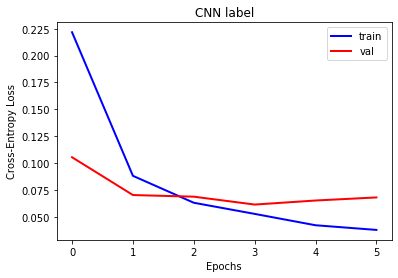

In [97]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('CNN label')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

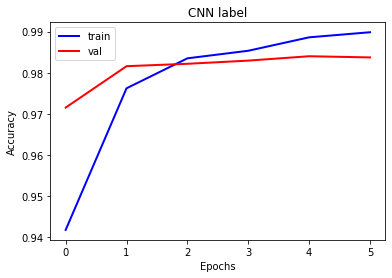

In [98]:
plt.figure()
plt.plot(hist.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('CNN label')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [99]:
def get_predictions(text):
    sequence = data["tokenizer"].texts_to_sequences([text])
    # pad the sequences
    sequence = pad_sequences(sequence, maxlen=sequence_length)
    # get the prediction
    prediction = model.predict(sequence)[0]
    return prediction, data["int2label"][np.argmax(prediction)]

In [100]:
text ="// TODO: check to be sure that the source and destination schemas are // different. Abort if they are the same and inform the user."
output_vector, prediction = get_predictions(text)
print("Output vector:", output_vector)
print("Prediction:", prediction)

Output vector: [1.0671432e-04 9.9986774e-01]
Prediction: yes


In [101]:
text ="// TODO: we loose encoding information here, fix it"
output_vector, prediction = get_predictions(text)
print("Output vector:", output_vector)
print("Prediction:", prediction)

Output vector: [6.7660308e-06 9.9999022e-01]
Prediction: yes


In [104]:
text ="// TODO: Ruby logic is somewhat more complicated here, see comments after"
output_vector, prediction = get_predictions(text)
print("Output vector:", output_vector)
print("Prediction:", prediction)

Output vector: [1.5922639e-07 9.9999976e-01]
Prediction: yes


In [105]:
text ="// return last value from execution"
output_vector, prediction = get_predictions(text)
print("Output vector:", output_vector)
print("Prediction:", prediction)

Output vector: [0.9985699  0.00159317]
Prediction: no


<h1> Testing our model </h1>

In [109]:
dtest=pd.read_csv("D:/RIT/GA-TECHNICAL DEBTS/rudimentary-stages/data/all/jruby-1.4.0.csv")

In [110]:
dtest

,ID,projectname,classification,Abstract,label
0,0,jruby-1.4.0,DEFECT,"// TODO: we loose encoding information here, f...",yes
1,1,jruby-1.4.0,DEFECT,"/* TODO: We should use implicit nil for body, ...",yes
2,2,jruby-1.4.0,DEFECT,// TODO: Numeric.new works in Ruby and it does...,yes
3,3,jruby-1.4.0,DEFECT,// TODO: Adding implicit nils caused multiple ...,yes
4,4,jruby-1.4.0,DEFECT,// TODO: take BigDecimal.mode into account.,yes
...,...,...,...,...,...
4892,4892,jruby-1.4.0,WITHOUT_CLASSIFICATION,/* ^Z */,no
4893,4893,jruby-1.4.0,WITHOUT_CLASSIFICATION,// direct invocation of the command,no
4894,4894,jruby-1.4.0,WITHOUT_CLASSIFICATION,// include its parent (and in turn that module...,no
4895,4895,jruby-1.4.0,WITHOUT_CLASSIFICATION,"// single string command, pass to sh to expand...",no


In [114]:
c=dtest[['Abstract']]
l=dtest[['label']]

In [117]:
labels_test=[]
for i, row in l.iterrows():
    labels_test.append(row['label'])
    
comments_test=[]
for i, row in c.iterrows():
    comments_test.append(row['Abstract'])

In [120]:
NUM_WORDS=20000
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)
tokenizer.fit_on_texts(comments_test)
Xtest = tokenizer.texts_to_sequences(comments_test)
Xtest,ll= np.array(Xtest), np.array(labels_test)
Xtest = pad_sequences(Xtest,maxlen=1000)

In [122]:
label_encoder = LabelEncoder()
vec1 = label_encoder.fit_transform(ll)
ytest=to_categorical(vec1)

In [140]:
ytest

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [126]:
Xtest.shape

(4897, 1000)

In [141]:
scores1 = model.evaluate(Xtest, ytest, verbose=0)
print("Accuracy: %.2f%%" % (scores1[1]*100))

Accuracy: 84.24%


In [149]:
y_pred=model.predict(Xtest)

In [150]:
y_pred

array([[9.9958235e-01, 4.3043494e-04],
       [9.9945152e-01, 5.4299831e-04],
       [9.9892592e-01, 1.1329651e-03],
       ...,
       [9.9900079e-01, 1.0266602e-03],
       [9.9971342e-01, 3.2153726e-04],
       [9.9684203e-01, 3.4645498e-03]], dtype=float32)

<h1> how to get true labels? </h1>

In [148]:
con_mat = tf.math.confusion_matrix(labels=ytest, predictions=y_pred).numpy()

InvalidArgumentError: Shapes of all inputs must match: values[0].shape = [4897,2] != values[1].shape = [2] [Op:Pack] name: stack